# Contraste de hipótesis - AB testing

Basándose en el siguiente conjuntos de datos

```python
!wget https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv
```

estudie si existe diferencia significativa de media en los siguientes casos:



1.   Balance:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).
2.   Variable `'deposit'`:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).

Haga un análisis detallado cuando proceda.

## Vistazo a los datos

In [1]:
#importamos libreriras
import random
import scipy.stats as scs
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.isnull().sum().sum()

0

In [4]:
duplicates=df.duplicated()
num_duplicates=duplicates.sum()
if duplicates.any():
    print("Se han encontrado duplicados en el DataFrame.")
    print('Hay un total de', num_duplicates, 'valores duplicados en el DataFrame.')
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Balance

##### Comprobar la normalidad en la distribución

In [9]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(df['balance'])
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


<Axes: xlabel='balance', ylabel='Count'>

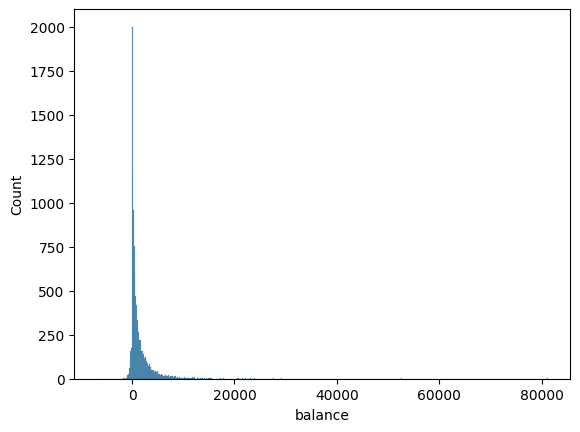

In [10]:
sns.histplot(data=df,x='balance')

Se utiliza el test de Shapiro-Wilk para determinar si la distribución en la columna balance sigue una distribución Gaussiana (hipótesis nula). Tras la realización del test se determina que se debe rechazar la hipótesis nula, por lo que la columna no seguiría dicha distribución.

Ahora procedemos a estudiar muestras dentro de la columna balance para comprobar si la distribución de dichas muestras tiene la misma mediana, para ello se va a utilizar el test de Mann-Whitney el cuál determina si la distribución de las muestras pertenecientes a dos grupos distintos son iguales (hipótesis nula).

##### Meses impares (A) contra meses pares (B)

Observamos los datos dentro de la columna balance y los dividimos en dos grupos distintos, uno que se corresponde con el balance de los meses pares y otro, con los meses impares.

In [43]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [44]:
meses_pares=['feb', 'apr', 'jun', 'aug', 'oct', 'dec']
# Requerimientos
from scipy.stats import mannwhitneyu
# Comprobamos hipótesis nula
group_A = df.loc[~df['month'].isin(meses_pares),'balance']
group_B = df.loc[df['month'].isin(meses_pares),'balance']
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
MW_test = mannwhitneyu(group_A, group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 1.3038963622958427e-17


<Axes: xlabel='balance', ylabel='Count'>

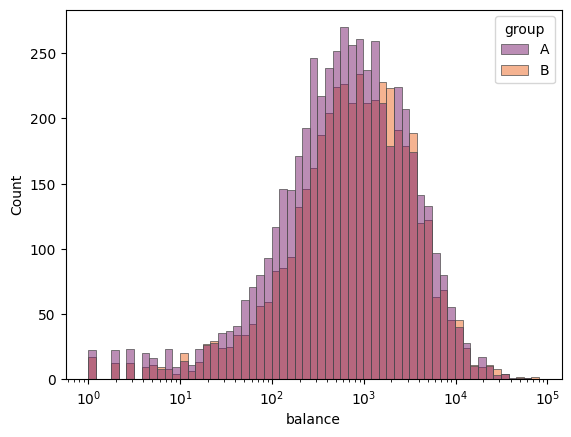

In [10]:
df['group'] = df['month'].apply(lambda x: 'A' if x in ['jan','mar','may','jul','sep','nov'] else 'B')
sns.histplot(
    df.loc[df['balance']>0,:],
    x="balance", hue="group",
    multiple="layer",
    palette="inferno",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

Se rechaza la hipótesis nula y se concluye que la distribución de los valores no es la misma en los dos grupos. Por tanto se puede concluir que para los meses impares y pares se ha obtenido una distribución de balance diferente, a pesar de ser datos tomados para el mismo grupo de población.

##### Estado civil `'married'` (A) contra `'single'` (B)

Observamos los datos dentro de la columna balance y los dividimos en dos grupos distintos, uno que se corresponde con el balance de aquellos casados y otro, para aquellos que están solteros.

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [45]:
# Se obtienen las dos muestras.
group_A = df.loc[df['marital'].isin(['married']),'balance']
group_B = df.loc[df['marital'].isin(['divorced']),'balance']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


In [46]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.0020600050816667794


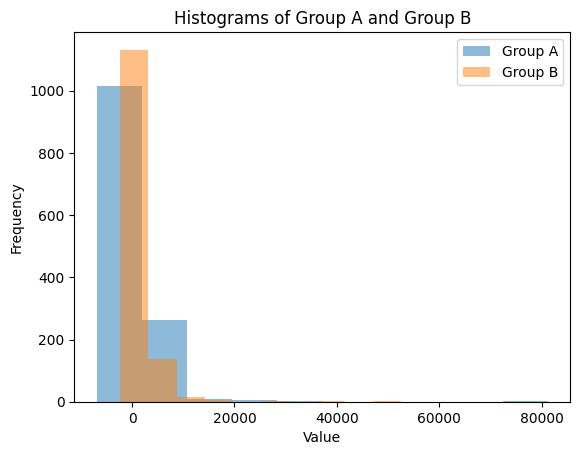

In [18]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [19]:
fig = px.violin(df,
    x='marital',
    y='balance',
    color='marital',
    box=True,
    points='all',
    template='plotly_dark'
)
fig.show()

Para este caso, se rechaza la hipótesis nula, determinando que hay una diferencia significativa en la mediana de ambos grupos, obteniendo una distribución distinta.

##### Trabajo `'unemployed'` (A) contra `'technician'` (B)

Observamos los datos dentro de la columna balance y los dividimos en dos grupos distintos, uno que se corresponde con el balance de los desempleados y otro, con el de empleados técnicos.

In [47]:
# Se obtienen las dos muestras.
group_A = df.loc[df['job'].isin(['unemployed']),'balance']
group_B = df.loc[df['job'].isin(['technician']),'balance']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 1.4867837125511338e-26
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


In [20]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.4736821506725607


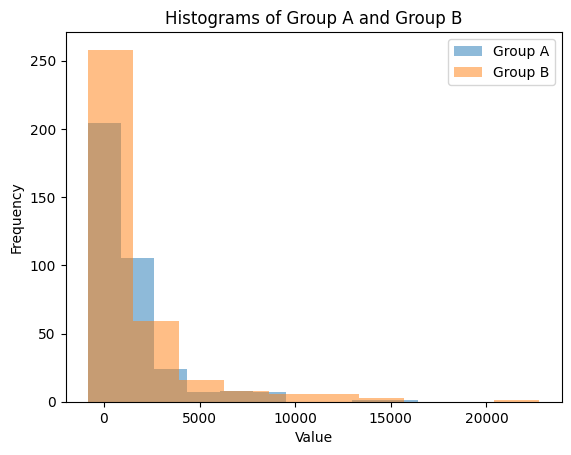

In [21]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [22]:
fig = px.violin(df,
    x='job',
    y='balance',
    color='job',
    box=True,
    points='all',
    template='plotly_dark'
)
fig.show()

En este caso, no se ha podido rechazar la hipótesis nula, obteniendo un p-valor mayor a 0.05, por lo que se concluye que la mediana entre ambos grupos puede ser la misma, al no haber obtenido una diferencia significativa en la distribución de los dos grupos.

##### Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B)

In [48]:
# Se obtienen las dos muestras.
group_A = df.loc[df['duration']<df['duration'].mean(),'balance']
group_B = df.loc[df['duration']>df['duration'].median(),'balance']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.00016602791221872562


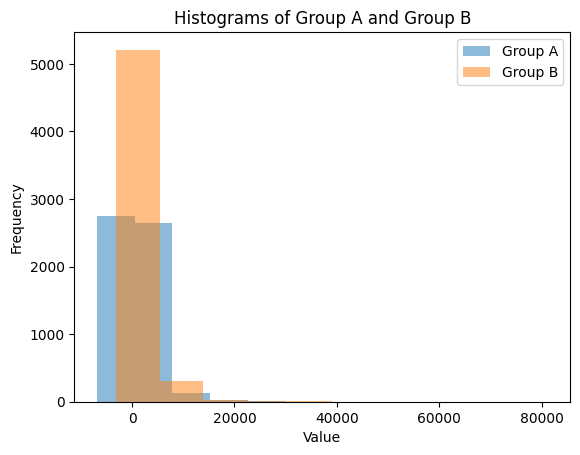

In [24]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

En el caso de la duración, se rechaza la hipótesis nula, obteniendo una distribución diferente para ambos grupos en el balance para la duración por debajo de la media y por encima de la mediana.

##### Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B)

In [49]:
# Se obtienen las dos muestras
group_A = df.loc[df['campaign']<df['campaign'].median(),'balance']
group_B = df.loc[df['campaign']>df['campaign'].median(),'balance']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


In [25]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.00023905845433578625


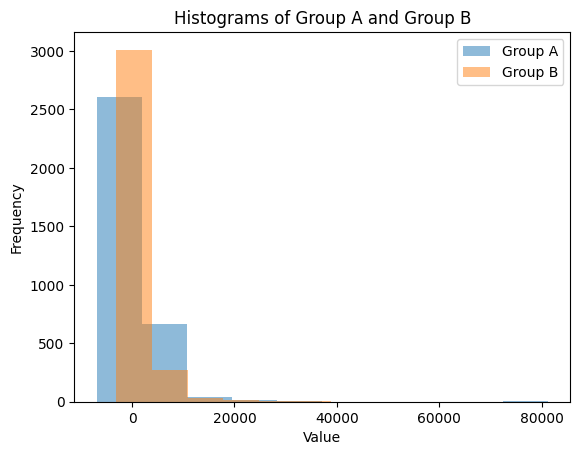

In [26]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Se rechaza la hipótesis nula, determinando que la distribución de ambos grupos es distinta, indicando una diferencia significativa en el balance de los usuarios que aceptan campañas dentro de estos dos grupos

## Deposit

##### Comprobar la normalidad de la distribución

In [26]:
df['deposit_code']=df['deposit'].map({'no':0,'yes':1})

In [27]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(df['deposit_code'])
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: xlabel='deposit_code', ylabel='Count'>

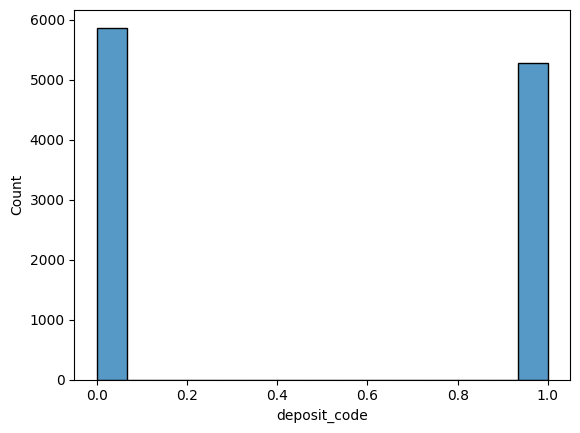

In [29]:
sns.histplot(data=df,x='deposit_code')

De aquí se concluye que la hipótesis nula es rechazada, obteniendo una distribución no Gaussiana entre las variables.

Se procede a estudiar los mismos grupos anteriormente mostrados en función del depósito.

##### Estado civil `'married'` (A) contra `'single'` (B)

In [31]:
marital_deposit_table = pd.crosstab(index=df[(df['marital']=='married')|(df['marital']=='single')]["marital"], columns=df["deposit_code"])
chi2, p, dof, expected = chi2_contingency(marital_deposit_table)
("p-value: ",p)

('p-value: ', 1.7410340149856223e-25)

In [32]:
marital_deposit_table

deposit_code,0,1
marital,,
married,3596,2755
single,1606,1912


A partir del test Chi-cuadrado se ha estudiado la relación entre las variables categóricas que determinan el estado marital y depósito. Tras el resultado del p-valor, se rechaza la hipótesis nula, determinando que parece haber una dependencia entre ambas variables.

In [50]:
group_A = df.loc[df['marital'].isin(['married']),'deposit_code']
group_B = df.loc[df['marital'].isin(['divorced']),'deposit_code']
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.003935155911105602


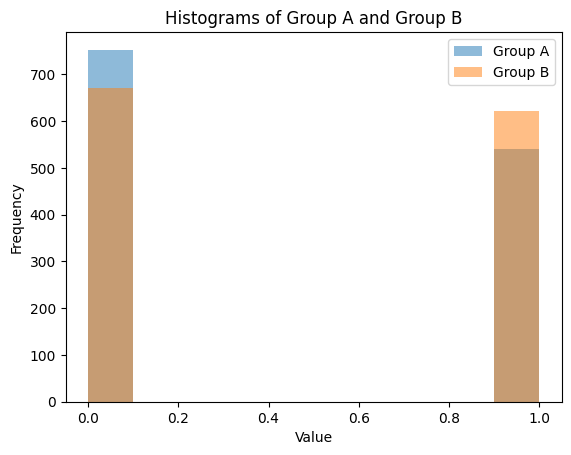

In [33]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [34]:
fig = px.violin(df,
    x='marital',
    y='deposit',
    color='marital',
    box=True,
    points='all',
    template='plotly_dark'
)
fig.show()

Se concluye que se rechaza la hipótesis nula, obteniendo una distribución diferente para ambos grupos. Esto indica que dentro de los grupos no hay el mismo número de personas que realiza y que no los depósitos.

##### Trabajo `'unemployed'` (A) contra `'technician'` (B)

In [35]:
job_deposit_table = pd.crosstab(index=df[(df['job']=='unemployed')|(df['job']=='technician')]["job"], columns=df["deposit_code"])
chi2, p, dof, expected = chi2_contingency(job_deposit_table)
("p-value: ",p)

('p-value: ', 0.0003493480807093397)

In [36]:
job_deposit_table

deposit_code,0,1
job,,
technician,983,840
unemployed,155,202


Para estas variables, se rechaza la hipótesis nula, determinando que hay una dependencia entre ambas variables categóricas.

In [51]:
group_A = df.loc[df['job'].isin(['unemployed']),'deposit_code']
group_B = df.loc[df['job'].isin(['technician']),'deposit_code']
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 4.996432736190017e-27
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


In [38]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.00706607284730312


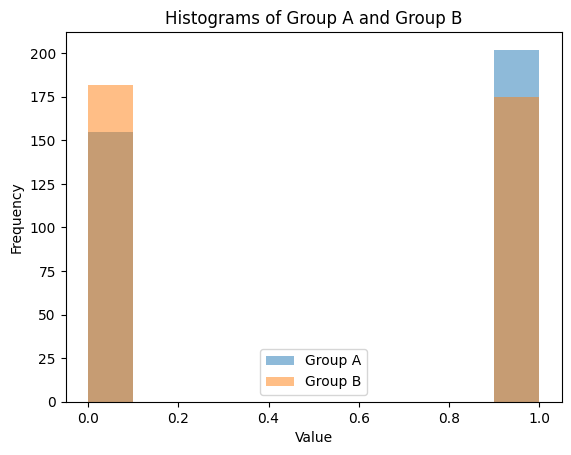

In [59]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [47]:
fig = px.violin(df,
    x='job',
    y='deposit',
    color='job',
    box=True,
    points='all',
    template='plotly_dark'
)
fig.show()

Para este caso, se rechaza la hipótesis nula, concluyendo que la distribución entre desempleados y empleados técnicos en función de si realizan o nó depósitos no es la misma.

##### Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B)

In [52]:
# Comprobamos hipótesis nula
group_A = df.loc[df['duration']<df['duration'].mean(),'deposit_code']
group_B = df.loc[df['duration']>df['duration'].median(),'deposit_code']
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.0


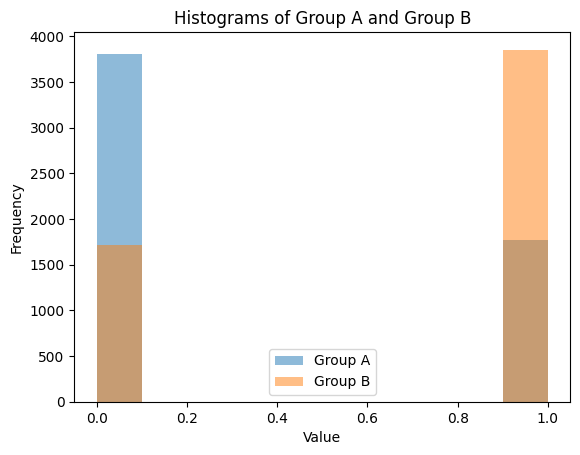

In [61]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Se rechaza la hipótesis nula para ambos grupos, obteniendo una distribución desigual para la duración por debajo de la media y por encima de la media, en función del ingreso del depósito.

##### Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B)

In [53]:
# Comprobamos hipótesis nula
group_A = df.loc[df['campaign']<df['campaign'].median(),'deposit_code']
group_B = df.loc[df['campaign']>df['campaign'].median(),'deposit_code']
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
# Si se rechaza la hipótesis nula (<0.05) se utilizará un test no paramétrico.
shapiro_test_A = shapiro(group_A)
shapiro_test_B = shapiro(group_B)
# Mostramos resultado
print(f"El p-valor obtenido en el test A de Shapiro-Wilk es de {shapiro_test_A[1]}")
print(f"El p-valor obtenido en el test B de Shapiro-Wilk es de {shapiro_test_B[1]}")

El p-valor obtenido en el test A de Shapiro-Wilk es de 0.0
El p-valor obtenido en el test B de Shapiro-Wilk es de 0.0


In [42]:
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 3.465941339990084e-29


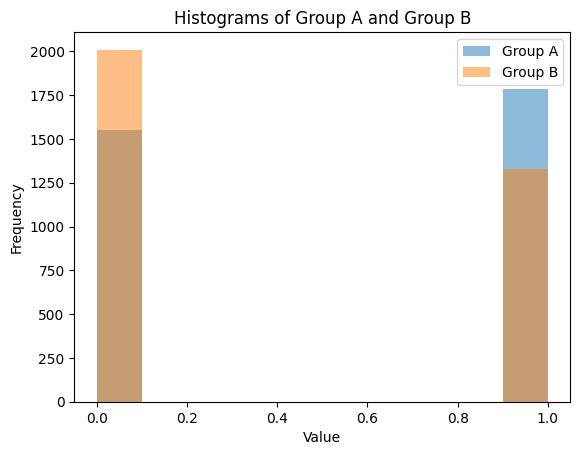

In [63]:
samples=pd.DataFrame({'A':group_A_sampled, 'B':group_B_sampled})
group_A_sampled=samples['A']
group_B_sampled=samples['B']

# Plot histograms for group_A_sampled and group_B_sampled
plt.hist(group_A_sampled, alpha=0.5, label='Group A')
plt.hist(group_B_sampled, alpha=0.5, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Group A and Group B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Se rechaza la hipótesis nula, determinando que no hay una misma distribución entre los usuarios y las campañas por encima y por debajo de la media, en función de si los clientes han realizado o no los depósidtos.